In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [64]:
# Data
data = {
    'gejala': [
        'Tidak bisa dinyalakan',
        'Bau asap keluar dari mesin',
        'Bunyi mesin aneh',
        'Mesin kehilangan tenaga',
        'Kehilangan kekuatan gas'
        'Asap keluar biru',
        'Bergetar secara tidak normal',
        'Motor panas berlebihan',
        'Bunyi berdecit saat berkendara',
        'Lampu indikator redup',
        'Rem tidak berfungsi',
        'Percepatan berkurang saat mengerem',
        'Motor tersendat-sendat',
        'Bocor oli',
        'Overheat pada mesin',
        'Asap menghitam bau',
        'Warna asap putih',
        'Bunyi mesin aneh',
        'Bunyi knocking',
        'Mesin berisik',
        'Turunnya performa mesin',
        'Getaran abnormal',
        'Bercak oli di bawah motor',
        'Pengurangan level oli',
        'Lampu indikator oli menyala',
        'Tarikan terasa berat',
        'Oli bocor dari blok mesin',
        'Mesin tidak dapat dinyalakan',
        'Kondisi aki melemah',
        'Lampu indikator baterai menyala',
        'Mesin sulit dihidupkan',
        'Starter motor berbunyi aneh',
        'Mesin mati mendadak',
        'Getaran kuat pada mesin',
        'Getaran pada kemudi',
        'Suara berisik saat berkendara',
        'Warna asap hitam',
        'Bau asap yang tidak biasa',
        'Mesin tidak berdaya',
        'Bunyi berdecit saat mengerem',
        'Rem terasa licin',
        'Percepatan berkurang saat mengerem',
        'Gesekan saat perpindahan gigi',
        'Kesulitan memindahkan tuas gigi',
        'Bunyi aneh dari transmisi',
        'Tersendat saat perpindahan',
        'Transmisi berbunyi kasar',
        'Ban terasa goyang',
        'Ban mengeluarkan asap',
        'Motor terasa licin',
        'Motor tidak enak saat belok',
        # Tambahkan gejala lain sesuai kebutuhan
    ],
    'kerusakan': [
        'Mesin',
        'Mesin',
        'Mesin',
        'Mesin',
        'Mesin',
        'Kelistrikan',
        'Kelistrikan',
        'Kelistrikan',
        'Kelistrikan',
        'Sistem Rem',
        'Sistem Rem',
        'Sistem Rem',
        'Sistem Rem',
        'Overheat',
        'Overheat',
        'Overheat',
        'Overheat',
        'Knocking sound',
        'Knocking sound',
        'Knocking sound',
        'Knocking sound',
        'Oil leakage',
        'Oil leakage',
        'Oil leakage',
        'Oil leakage',
        'Oil leakage',
        'Battery failure',
        'Battery failure',
        'Battery failure',
        'Starting issues',
        'Starting issues',
        'Starting issues',
        'Excessive vibration',
        'Excessive vibration',
        'Excessive vibration',
        'Smoke from exhaust',
        'Smoke from exhaust',
        'Smoke from exhaust',
        'Braking issues',
        'Braking issues',
        'Braking issues',
        'Transmission problems',
        'Transmission problems',
        'Transmission problems',
        'Transmission problems',
        'Transmission problems',
        'Ban',
        'Ban',
        'Ban',
        'Ban',
        # Tambahkan label lain sesuai kebutuhan
    ]
}

df = pd.DataFrame(data)
df.head()

,gejala,kerusakan
0,Tidak bisa dinyalakan,Mesin
1,Bau asap keluar dari mesin,Mesin
2,Bunyi mesin aneh,Mesin
3,Mesin kehilangan tenaga,Mesin
4,Kehilangan kekuatan gasAsap keluar biru,Mesin


In [65]:
# Check panjang array di kolom 'gejala' dan 'kerusakan'
print("Panjang gejala:", len(data['gejala']))
print("Panjang kerusakan:", len(data['kerusakan']))


Panjang gejala: 50
Panjang kerusakan: 50


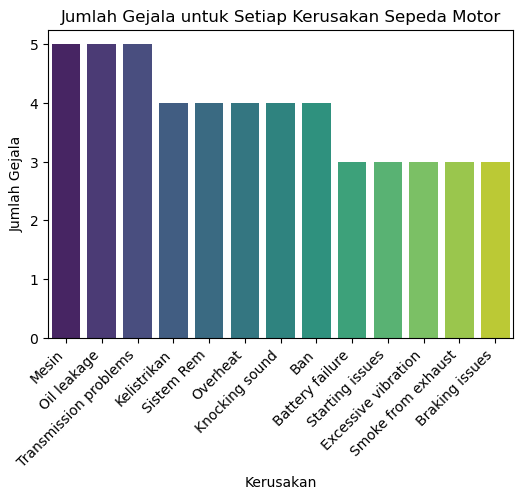

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung jumlah gejala untuk setiap kerusakan
jumlah_gejala = df['kerusakan'].value_counts()

# Membuat visualisasi dengan grafik batang
plt.figure(figsize=(6, 4))
sns.barplot(x=jumlah_gejala.index, y=jumlah_gejala.values, palette="viridis")
plt.title('Jumlah Gejala untuk Setiap Kerusakan Sepeda Motor')
plt.xlabel('Kerusakan')
plt.ylabel('Jumlah Gejala')
plt.xticks(rotation=45, ha='right')
plt.show()

In [80]:
# Membagi data menjadi training dan testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Tokenisasi teks
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data['gejala'])
vocab_size = len(tokenizer.word_index) + 1

# Mengonversi teks menjadi sequences
X_train = tokenizer.texts_to_sequences(train_data['gejala'])
X_test = tokenizer.texts_to_sequences(test_data['gejala'])

# Padding sequences agar memiliki panjang yang sama
maxlen = max(len(seq) for seq in X_train + X_test)
X_train_padded = pad_sequences(X_train, padding='post', maxlen=maxlen) #NOTE
X_test_padded = pad_sequences(X_test, padding='post', maxlen=maxlen)

# Label encoding untuk kolom target
label_to_index = {label: i for i, label in enumerate(df['kerusakan'].unique())}
y_train = train_data['kerusakan'].map(label_to_index)
y_test = test_data['kerusakan'].map(label_to_index)

In [74]:
# Membuat model
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=maxlen))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(len(label_to_index), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Melatih model
model.fit(X_train_padded, y_train, epochs=50, validation_data=(X_test_padded, y_test), batch_size=32)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 5, 100)            7900      
                                                                 
 lstm_9 (LSTM)               (None, 128)               117248    
                                                                 
 dense_12 (Dense)            (None, 13)                1677      
                                                                 
Total params: 126,825
Trainable params: 126,825
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
2/2 [==============================] - 7s 741ms/step - loss: 2.5670 - accuracy: 0.0500 - val_loss: 2.5695 - val_accuracy: 0.0000e+00
Epoch 2/50
2/2 [==============================] - 0s 95ms/step - loss: 2.5583 - accuracy: 0.1000 - val_loss: 2.5721 - val_accuracy: 0.0000e+00
Epoch 3/50
2/2 [========

1/1 [==============================] - 1s 901ms/step


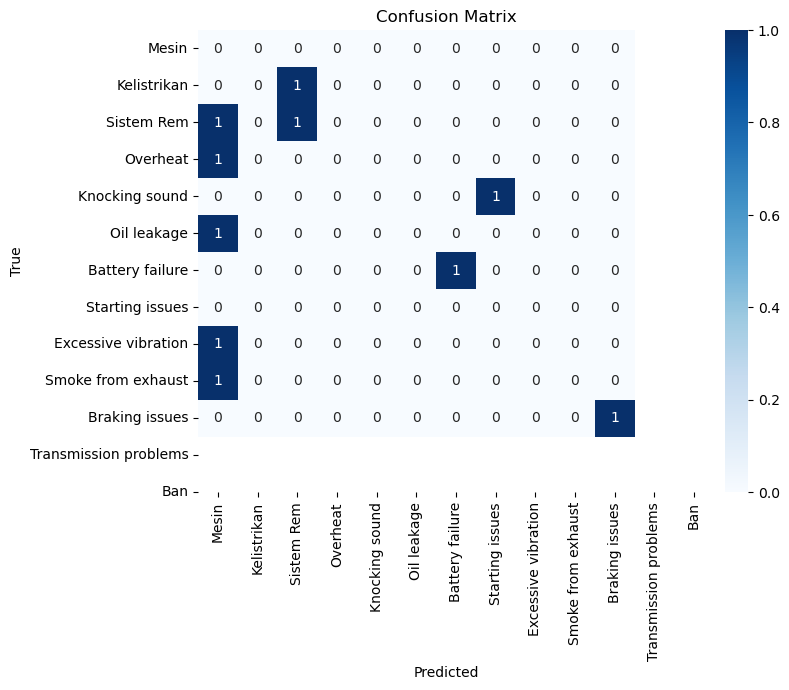

In [75]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Melakukan prediksi pada data pengujian
y_pred = model.predict(X_test_padded)

# Mengonversi prediksi yang berupa probabilitas menjadi kelas
y_pred_classes = np.argmax(y_pred, axis=1)

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Menampilkan confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_to_index.keys(), yticklabels=label_to_index.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [76]:
import tkinter as tk
from tkinter import ttk
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assume label_to_index is defined during training
label_to_index = {label: i for i, label in enumerate(df['kerusakan'].unique())}

# Fungsi untuk mengonversi teks menjadi sequence
def text_to_sequence(text):
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=X_train_padded.shape[1])
    return padded_sequence

# Fungsi untuk memprediksi kerusakan
def predict_damage():
    selected_gejala = [gejala[i] for i, var in enumerate(checkbox_vars) if var.get() == 1]
    
    # Hanya memproses jika ada gejala yang dipilih
    if selected_gejala:
        # Maksimal 3 gejala yang dicentang
        selected_gejala = selected_gejala[:3]

        # Mengonversi teks menjadi sequence
        input_text = ' '.join(selected_gejala)
        input_sequence = text_to_sequence(input_text)

        # Melakukan prediksi
        prediction = model.predict(input_sequence)

        # Mengambil indeks label dengan probabilitas tertinggi
        predicted_category_index = prediction.argmax(axis=1)[0]

        # Mendapatkan nama kategori berdasarkan indeks
        predicted_category = list(label_to_index.keys())[list(label_to_index.values()).index(predicted_category_index)]

        # Menampilkan hasil prediksi
        result_label.config(text=f"Kemungkinan Kerusakan: {predicted_category}")
    else:
        result_label.config(text="Silakan pilih setidaknya satu gejala.")

In [81]:
# Membuat GUI
root = tk.Tk()
root.title("Deteksi Kerusakan Sepeda Motor")

# List untuk menyimpan variabel checkbox
checkbox_vars = []

# Membuat checkbox untuk setiap gejala
gejala = df['gejala']
num_gejala = len(gejala)

# Menentukan jumlah kolom
num_cols = 3
# Menentukan jumlah baris (dibulatkan ke atas agar cukup untuk semua gejala)
num_rows = -(-num_gejala // num_cols)

for i, g in enumerate(gejala):
    var = tk.IntVar()
    checkbox = ttk.Checkbutton(root, text=g, variable=var)
    # Menentukan posisi baris dan kolom
    checkbox.grid(row=i // num_cols, column=i % num_cols, sticky="w", padx=10, pady=5)
    checkbox_vars.append(var)

# Tombol untuk memprediksi kerusakan
predict_button = ttk.Button(root, text="Prediksi Kerusakan", command=predict_damage)
# Menentukan posisi tombol pada baris setelah checkbox
predict_button.grid(row=num_rows, column=0, columnspan=num_cols, pady=10)

# Label untuk menampilkan hasil prediksi
result_label = ttk.Label(root, text="")
# Menentukan posisi label pada baris setelah tombol
result_label.grid(row=num_rows + 1, column=0, columnspan=num_cols, pady=5)

# Menjalankan GUI
root.mainloop()

1/1 [==============================] - 0s 59ms/step
